In [31]:
data = read.csv('Churn.csv', sep=';', stringsAsFactors=T, na.strings='')
colnames(data) = c(
    'id', 'score', 'estado', 'genero', 'idade', 'x1', 'saldo', 'x2', 'x3', 'x4',
    'salario', 'x5'
)
summary(data)
head(data)

       id             score       estado         genero        idade      
 Min.   :   1.0   Min.   :376.0   PR:257   F        :  2   Min.   :-20.0  
 1st Qu.: 251.5   1st Qu.:580.0   RP:  1   Fem      :  1   1st Qu.: 32.0  
 Median : 501.0   Median :653.0   RS:478   Feminino :461   Median : 37.0  
 Mean   : 500.9   Mean   :648.6   SC:258   M        :  6   Mean   : 38.9  
 3rd Qu.: 750.5   3rd Qu.:721.0   SP:  4   Masculino:521   3rd Qu.: 44.0  
 Max.   :1000.0   Max.   :850.0   TD:  1   NA's     :  8   Max.   :140.0  
                                                                          
       x1             saldo                x2              x3        
 Min.   : 0.000   Min.   :       0   Min.   :1.000   Min.   :0.0000  
 1st Qu.: 2.000   1st Qu.:       0   1st Qu.:1.000   1st Qu.:0.0000  
 Median : 5.000   Median : 8958835   Median :1.000   Median :1.0000  
 Mean   : 5.069   Mean   : 7164928   Mean   :1.527   Mean   :0.7027  
 3rd Qu.: 8.000   3rd Qu.:12586844   3rd Qu.:2.000

,id,score,estado,genero,idade,x1,saldo,x2,x3,x4,salario,x5
,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>
1,1,619,RS,Feminino,42,2,0,1,1,1,10134888,1
2,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258,0
3,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157,1
4,4,699,RS,Feminino,39,1,0,2,0,0,9382663,0
5,5,850,SC,Feminino,43,2,12551082,1,1,1,790841,0
6,6,645,SC,Masculino,44,8,11375578,2,1,0,14975671,1


## Dados nulos

In [32]:
data[!complete.cases(data), ]

,id,score,estado,genero,idade,x1,saldo,x2,x3,x4,salario,x5
,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>
18,18,549,SC,Feminino,24,9,0,2,1,1,NA,0
53,53,788,RS,Feminino,33,5,0,2,0,0,NA,0
65,65,603,PR,NA,26,4,10916637,1,1,1,9284067,0
85,86,493,RS,NA,46,4,0,2,1,0,190766,0
180,181,754,PR,Feminino,55,3,16160881,1,1,0,NA,1
214,215,676,RS,NA,34,1,6309501,1,1,1,4064581,0
297,298,714,RS,NA,31,4,12516926,1,1,1,10663689,0
331,332,656,RS,Masculino,50,7,0,2,0,1,NA,0
371,372,801,SC,NA,42,4,14194767,1,1,1,1059829,0


## Dados duplicados

In [33]:
data[duplicated(data$id), ]
data = data[-c(82), ]
data[duplicated(data$id), ]

,id,score,estado,genero,idade,x1,saldo,x2,x3,x4,salario,x5
,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>
82,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366,0


id,score,estado,genero,idade,x1,saldo,x2,x3,x4,salario,x5
<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>


## Genero

F       Fem  Feminino         M Masculino      NA's 
        2         1       460         6       521         8

Feminino Masculino 
      463       535

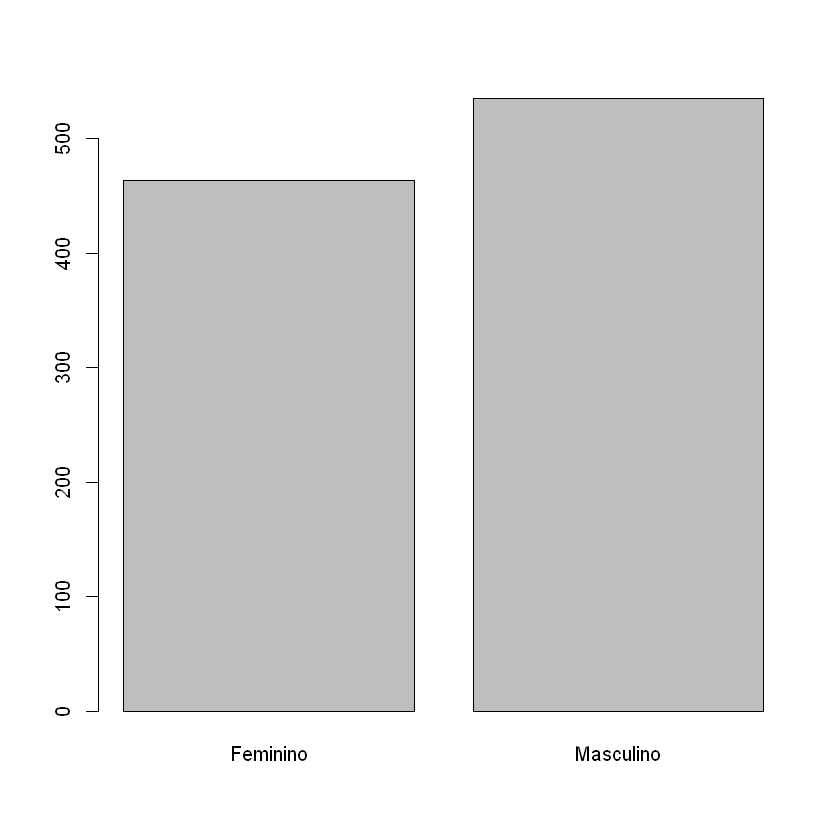

In [34]:
summary(data$genero)
data[is.na(data$genero) | data$genero == 'M', ]$genero = 'Masculino'
data[data$genero == 'F' | data$genero == 'Fem', ]$genero = 'Feminino'
data$genero = factor(data$genero)
summary(data$genero)
plot(data$genero)

## Salario

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
9.677e+03 3.020e+06 8.696e+06 3.531e+07 1.405e+07 1.193e+10         7 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
9.677e+03 3.076e+06 8.696e+06 3.512e+07 1.401e+07 1.193e+10 

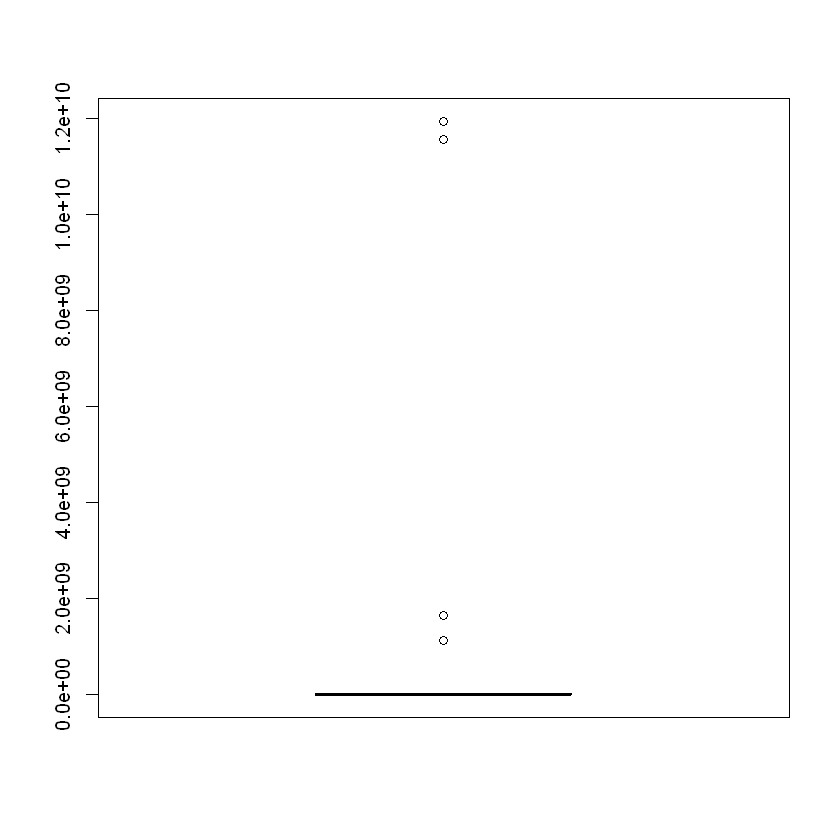

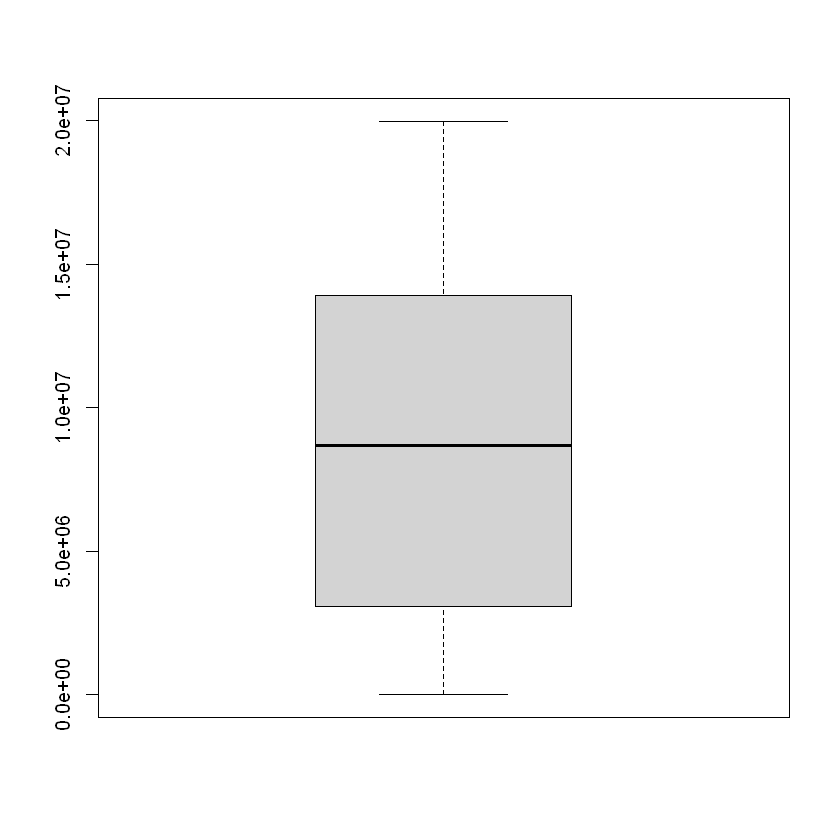

In [35]:
summary(data$salario)
media = median(data$salario, na.rm=T)
data[is.na(data$salario), ]$salario = media
summary(data$salario)
boxplot(data$salario)
desv = sd(data$salario)
data[data$salario >= 2 * desv, ]$salario = media
boxplot(data$salario)

### Checando valores nulos

In [36]:
data[!complete.cases(data), ]

id,score,estado,genero,idade,x1,saldo,x2,x3,x4,salario,x5
<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>


## Score

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  376.0   580.0   653.0   648.6   721.0   850.0 

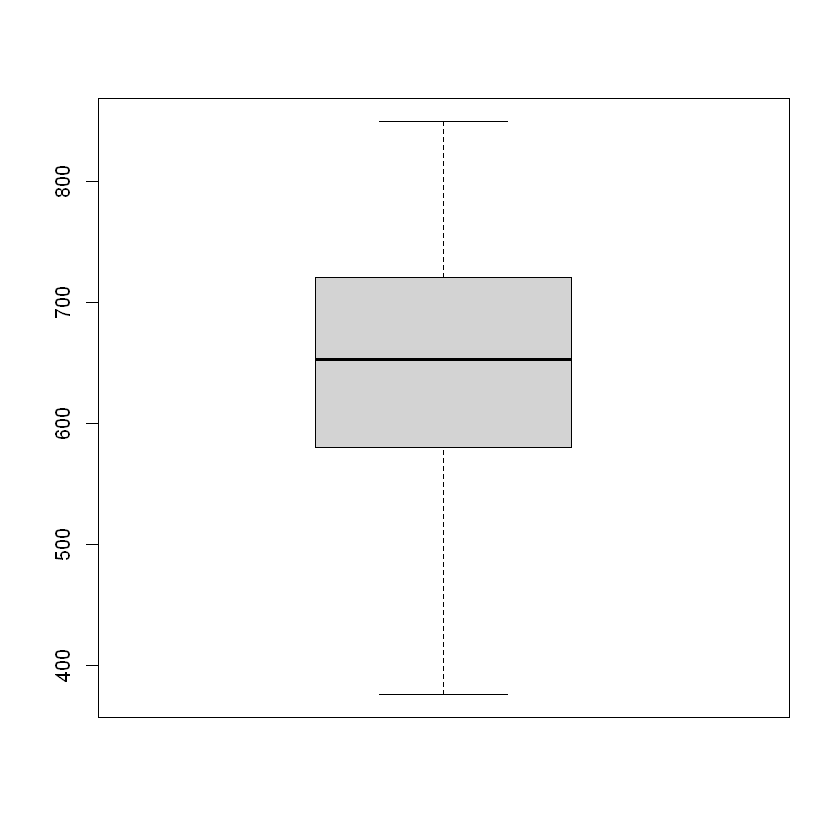

In [37]:
summary(data$score)
boxplot(data$score)

## Estado

PR  RP  RS  SC  SP  TD 
257   1 477 258   4   1

PR  RS  SC 
257 483 258

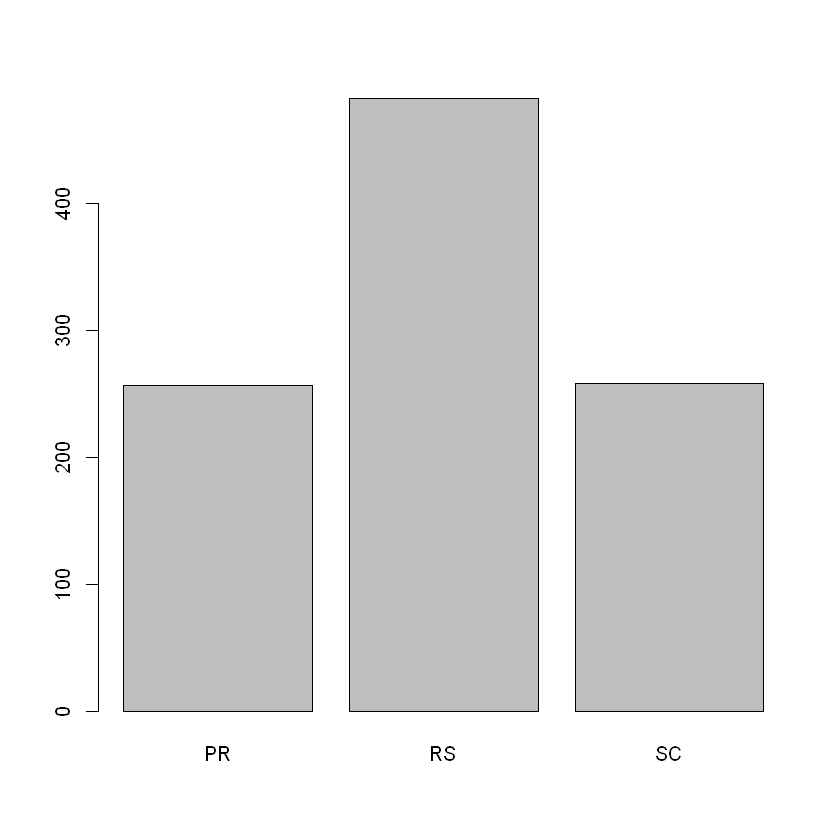

In [38]:
summary(data$estado)
data[data$estado %in% c('RP', 'SP', 'TD'), ]$estado = 'RS'
data$estado = factor(data$estado)
summary(data$estado)
plot(data$estado)

## Idade

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -20.00   32.00   37.00   38.91   44.00  140.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   32.00   37.00   38.91   44.00   82.00 

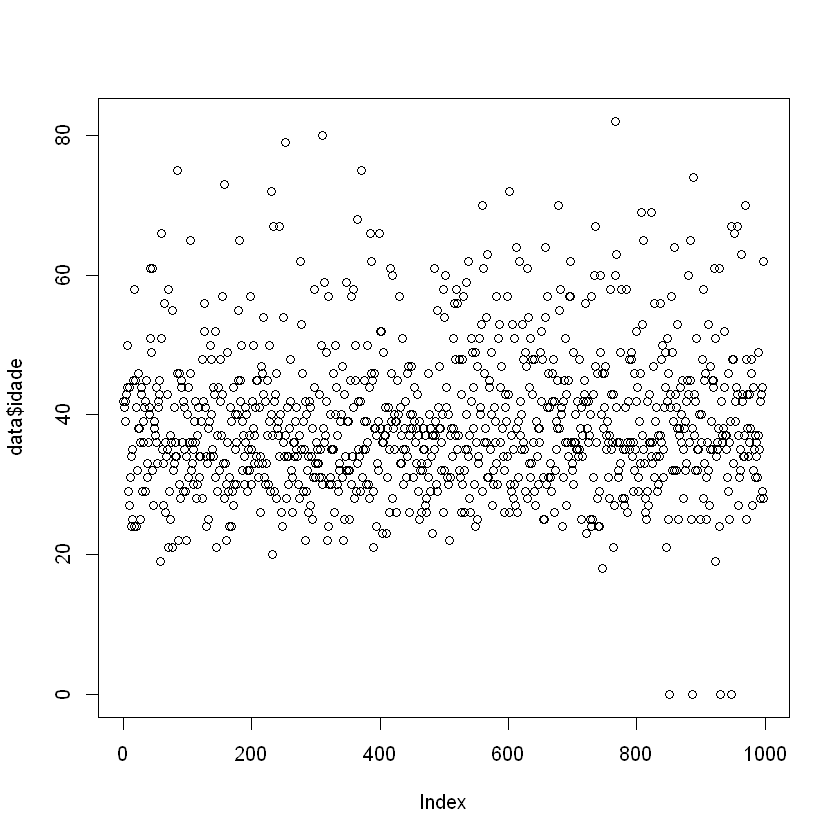

In [39]:
summary(data$idade)
media = median(data$idade)
data[data$idade < 0 | data$idade > 110, ]$idade = media
summary(data$idade)
plot(data$idade)

## Saldo

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
       0        0  8926348  7162423 12587670 21177431 

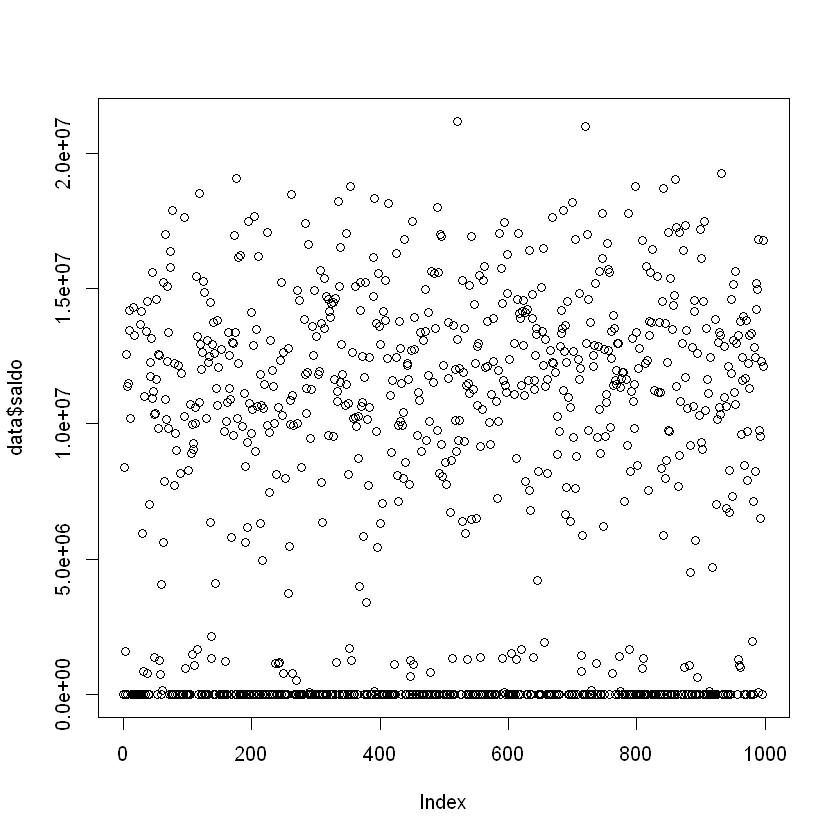

In [40]:
summary(data$saldo)
plot(data$saldo)

### Ignorando valores ZERO

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   63227  9296814 11644576 11031016 13745242 21177431 

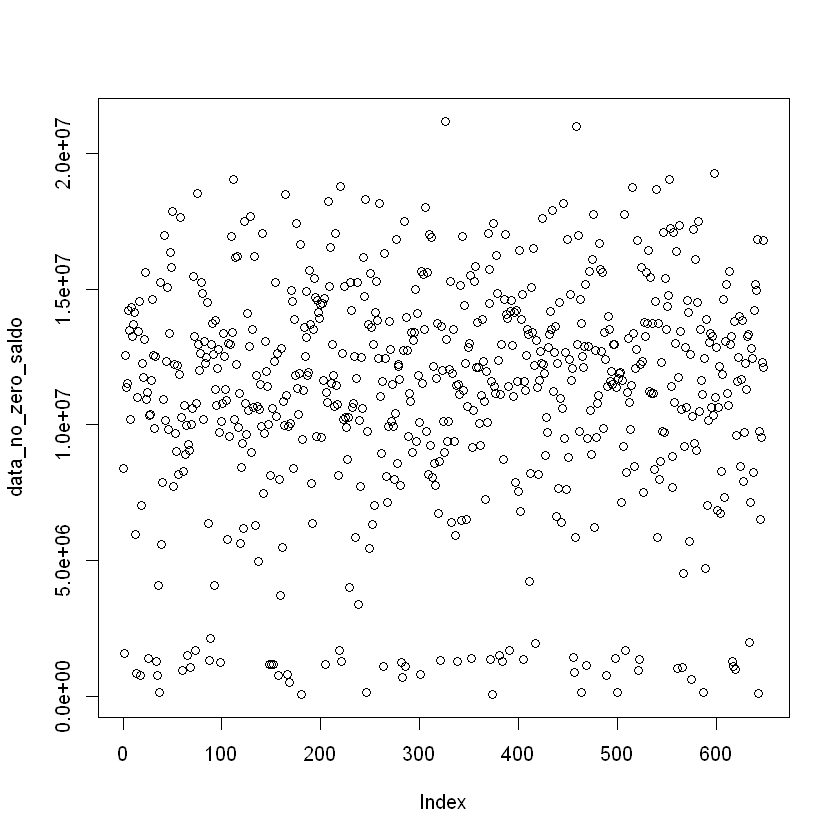

In [41]:
data_no_zero_saldo = data[data$saldo > 0, ]$saldo
summary(data_no_zero_saldo)
plot(data_no_zero_saldo)